#### Check if GPU is available
If you are running this in gsds server, follow the instruction below to run jupyter notebook with GPU.

https://gsds.gitbook.io/gsds/for-beginners/slurm

In [ ]:
import torch
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

#### Install requried packages if not installed in your environment

In [ ]:
!pip install wikipedia
!pip install transformers
!pip install -q datasets

#### Run this cell before you start

In [2]:
from matplotlib import pyplot as plt
from collections import OrderedDict
import wikipedia as wiki
from transformers import AutoTokenizer, AutoModelForQuestionAnswering
import torch
from torch.utils.data import Dataset, DataLoader

# 1. Inference using a pre-trained Question Answering model 

In this problem, we will utilize a pre-trained BERT(Bidirectional Encoder Representations from Transformers) model for question answering. BERT excels in this task by leveraging its contextual understanding of language, employing techniques such as tokenization, segment embeddings, positional embeddings, and multi-head self-attention to capture intricate relationships between words. During the inference phase, the model predicts answer spans in a passage based on its extensive pre-trained knowledge and fine-tuned task-specific understanding. 

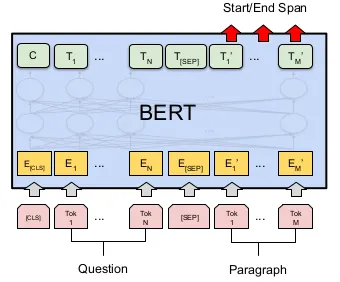

There are various approaches to employing deep learning models for question answering, and we will explore the intricacies of this task in upcoming lectures. For now, prepare for a hands-on journey into loading a pre-trained BERT model from Hugging Face, which encodes questions and context together and answers by selecting a span in the given context. The model's output includes scores for the start and end positions of the answer span. Follow the instructions in the provided Jupyter notebook to complete the code.

**(a)** Load the pre-trained model and tokenizer and complete the `__init__` function. **(2 pts)**

**(b)** Implement the `tokenize` function to encode the question and context. **(6 pts)**

**(c)** Complete the `generateAnswer` function for inference. **(12 pts)**

**(d, bonus)** Add a condition that ensures the end position comes after the start position in your inference code. **(4 pts)**

In [ ]:
class QAmodel:
    def __init__(self, model_path):
        self.model_path = model_path

        ### YOUR CODE HERE (~2 lines)
        ### TODO:
        ### Load a tokenizer and question answering model from hugging face and save them in self.tokenizer and self.model
        ### Hint: you can refer to the following document and use given model_path
        ### https://huggingface.co/docs/transformers/model_doc/auto#transformers.AutoModelForQuestionAnswering
        

        
        ### END YOUR CODE
        self.max_seq_len = self.model.config.max_position_embeddings
        self.splitted = False

    def tokenize(self, question, context):
        ### YOUR CODE HERE (~5 lines)
        ### TODO:
        ### 1. Encode the question and context by passing into the loaded tokenizer and save it to self.inputs
        ###     Hint: you have to return 'token_type_ids' in order to be used in self.split()
        ###     Hint: you can refer to the following document for tokenizer
        ###           https://huggingface.co/transformers/v2.11.0/main_classes/tokenizer.html
        ### 2. If input length exceeds the maximum sequence length, the input context should be splitted. Mark self.splitted True if it is splitted.
        ###     Hint: use given self.max_seq_len and self.split()
        ### Hint: this function will return nothing
        


        ### END YOUR CODE

    def split(self):
        # this function is to split the input context if the length exceeds the maximum sequence length
        question_mask = self.inputs['token_type_ids'].lt(1)
        question_size = torch.masked_select(self.inputs['input_ids'], question_mask).size()[0]
        split_size = self.max_seq_len - question_size - 1

        inputs_splitted = OrderedDict()
        for key, item in self.inputs.items():
            question = torch.masked_select(item, question_mask)
            context = torch.masked_select(item, ~question_mask)
            context_splitted = torch.split(context, split_size)

            for i, context in enumerate(context_splitted):
                if i not in inputs_splitted:
                    inputs_splitted[i] = {}
                input_item = torch.cat((question, context))
                if i != len(context_splitted) - 1:
                    if key == 'input_ids':
                        input_item = torch.cat((input_item, torch.tensor([102])))
                    else:
                        input_item = torch.cat((input_item, torch.tensor([1])))
                inputs_splitted[i][key] = torch.unsqueeze(input_item, dim=0)

        return inputs_splitted

    def generateAnswer(self):
        if self.splitted:
            answer = ''
            for i, input_item in self.inputs.items():

                ### YOUR CODE HERE (~6 lines)
                ### TODO:
                ### Get answer from each of the splitted contexts. 
                ### Remember that this model predicts answer by span selection. The output will contain scores for start and end position. 
                ### Hint: Use torch.argmax and given self.convert_to_string function
                ### Hint: You should note that in a Python index [A:B], it includes the element at index A and excludes the element at index B.
                ### Hint: you can refer to the following document 

 

                ### END YOUR CODE
                if ans != '[CLS]':
                    answer += ans + ", "
            return answer
        
        else:
            ### YOUR CODE HERE (~6 lines)
            ### TODO:
            ### Get answer from self.inputs.
            ### Hint: use the same approach you made in the previous question



            ### END YOUR CODE
            return answer

    def convert_to_string(self, input_ids):
        tokens = self.tokenizer.convert_ids_to_tokens(input_ids)
        answer = self.tokenizer.convert_tokens_to_string(tokens)
        return answer

### Inference

Now let's use the pre-trained model to generate answer to the questions. 

For context, we will use Wikipedia, a Python library that makes it easy to access and parse data from Wikipedia.
You can refer to [here](https://wikipedia.readthedocs.io/en/latest/code.html#api) for use of the library.

In [ ]:
questions = [
    'Who is the author of Harry Potter and the Goblet of Fire?',
    'Where was the 2010 world cup played?'
    ]

model_path = "deepset/bert-base-cased-squad2"
model = QAmodel(model_path)

for question in questions:
    print(f"Question: {question}")
    results = wiki.search(question)

    page = wiki.page(results[0])
    print(f"Top wiki result: {page}")
    context = page.content

    model.tokenize(question, context)
    answer = model.generateAnswer()
    print(f"Answer: {answer}")
    print("---------------------------------------------------------------------------------")